In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from glob import glob
import shutil

In [29]:
from zipfile import ZipFile

In [3]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [32]:
!ls

disease-detection-model.ipynb plantvillage-dataset.zip
plantvillage dataset


In [33]:
import os

In [34]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'segmented', 'color']
38
['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy']
38
['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy']
38
['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy']


In [35]:
class_list = os.listdir("plantvillage dataset/color")
num_image = [len(os.listdir(f"plantvillage dataset/color/{cls}")) for cls in os.listdir("plantvillage dataset/color")]
class_image_counts = dict(zip(class_list, num_image))

In [36]:
class_image_counts

{'Strawberry___healthy': 456,
 'Grape___Black_rot': 1180,
 'Potato___Early_blight': 1000,
 'Blueberry___healthy': 1502,
 'Corn_(maize)___healthy': 1162,
 'Tomato___Target_Spot': 1404,
 'Peach___healthy': 360,
 'Potato___Late_blight': 1000,
 'Tomato___Late_blight': 1909,
 'Tomato___Tomato_mosaic_virus': 373,
 'Pepper,_bell___healthy': 1478,
 'Orange___Haunglongbing_(Citrus_greening)': 5507,
 'Tomato___Leaf_Mold': 952,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076,
 'Cherry_(including_sour)___Powdery_mildew': 1052,
 'Apple___Cedar_apple_rust': 275,
 'Tomato___Bacterial_spot': 2127,
 'Grape___healthy': 423,
 'Tomato___Early_blight': 1000,
 'Corn_(maize)___Common_rust_': 1192,
 'Grape___Esca_(Black_Measles)': 1383,
 'Raspberry___healthy': 371,
 'Tomato___healthy': 1591,
 'Cherry_(including_sour)___healthy': 854,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357,
 'Apple___Apple_scab': 630,
 'Corn_(maize)___Northern_Leaf_Blight': 985,
 'Tomato___Spider_mites Two-spotted_spider_mite': 16

In [37]:
dataset_path = "plantvillage dataset/color"

In [38]:
classes = os.listdir(dataset_path)

In [39]:
os.makedirs('data/train', exist_ok=True)
os.makedirs('data/validation', exist_ok=True)
os.makedirs('data/test', exist_ok=True)

In [49]:
# Function to split and move images
def split_and_move_images(cls, image_paths, train_ratio=0.8, val_ratio=0.1):
    # Check if there are enough images to split
    if len(image_paths) < 2:
        print(f"Class {cls} has too few images to split. Moving all to train.")
        for image in image_paths:
            shutil.move(image, os.path.join('data/train', cls))
        return

    # Calculate split sizes
    train_size = int(len(image_paths) * train_ratio)
    val_size = int(len(image_paths) * val_ratio)

    # Split the images into train, validation, and test sets
    train_images, temp_images = train_test_split(image_paths, train_size=train_size, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=val_size/(len(temp_images)), random_state=42)

    # Move images to respective directories
    for image in train_images:
        shutil.move(image, os.path.join('data/train', cls))
    for image in val_images:
        shutil.move(image, os.path.join('data/validation', cls))
    for image in test_images:
        shutil.move(image, os.path.join('data/test', cls))

# Create directories for train, validation, and test
for split in ['train', 'validation', 'test']:
    os.makedirs(f'data/{split}', exist_ok=True)

# Loop through each class and split the images
for cls in os.listdir(dataset_path):
    cls_path = os.path.join(dataset_path, cls)
    if os.path.isdir(cls_path):
        images = glob(os.path.join(cls_path, '*.*'))  # Adjust extensions if necessary
        print(f"Found {len(images)} images for class {cls}")

        # Create class-specific directories in train, validation, and test
        os.makedirs(os.path.join('data/train', cls), exist_ok=True)
        os.makedirs(os.path.join('data/validation', cls), exist_ok=True)
        os.makedirs(os.path.join('data/test', cls), exist_ok=True)

        # Split and move the images
        split_and_move_images(cls, images)

print("Dataset successfully split into train, validation, and test sets.")

Found 456 images for class Strawberry___healthy
Found 1180 images for class Grape___Black_rot
Found 1000 images for class Potato___Early_blight
Found 1502 images for class Blueberry___healthy
Found 1162 images for class Corn_(maize)___healthy
Found 1404 images for class Tomato___Target_Spot
Found 360 images for class Peach___healthy
Found 1000 images for class Potato___Late_blight
Found 1909 images for class Tomato___Late_blight
Found 373 images for class Tomato___Tomato_mosaic_virus
Found 1478 images for class Pepper,_bell___healthy
Found 5507 images for class Orange___Haunglongbing_(Citrus_greening)
Found 952 images for class Tomato___Leaf_Mold
Found 1076 images for class Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Found 1052 images for class Cherry_(including_sour)___Powdery_mildew
Found 275 images for class Apple___Cedar_apple_rust
Found 2127 images for class Tomato___Bacterial_spot
Found 423 images for class Grape___healthy
Found 1000 images for class Tomato___Early_blight
Found 11

In [51]:
print(len(os.listdir('data/validation/')))

38


In [53]:
print(len(os.listdir('data/train/')))

38


In [55]:
print(len(os.listdir('data/test/')))

38


In [57]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)


In [79]:
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    'data/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = train_datagen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 43429 images belonging to 38 classes.
Found 5459 images belonging to 38 classes.
Found 5417 images belonging to 38 classes.


In [81]:
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Regularization to avoid overfitting
    layers.Dense(38, activation='softmax')  # 38 classes in the dataset
])

In [61]:
# model = models.Sequential([
#     layers.Input(shape=(150, 150, 3)),
    
#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),

#     layers.GlobalAveragePooling2D(),
#     layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     layers.Dropout(0.5),  # Regularization
#     layers.Dense(38, activation='softmax')  # 38 classes
# ])

In [83]:
model.compile(
optimizer='adam', 
loss='categorical_crossentropy', 
metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,830,950 (26.06 MB)

 Trainable params: 6,830,950 (26.06 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 435s 320ms/step - accuracy: 0.3107 - loss: 2.5817 - val_accuracy: 0.6430 - val_loss: 1.1576
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 430s 316ms/step - accuracy: 0.6595 - loss: 1.1325 - val_accuracy: 0.7921 - val_loss: 0.6642
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 379s 278ms/step - accuracy: 0.7594 - loss: 0.7654 - val_accuracy: 0.8408 - val_loss: 0.5019
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 394s 290ms/step - accuracy: 0.8136 - loss: 0.5880 - val_accuracy: 0.8800 - val_loss: 0.3721
Epoch 5/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 386s 284ms/step - accuracy: 0.8452 - loss: 0.4869 - val_accuracy: 0.8960 - val_loss: 0.3297
Epoch 6/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 384s 282ms/step - accuracy: 0.8617 - loss: 0.4327 - val_accuracy: 0.9194 - val_loss: 0.2616
Epoch 7/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 367s 270ms/step - accuracy: 0.8841 - loss: 0.3698 - val_accuracy: 0.8943 - val_loss: 0.3322
Epoch 8/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 370s 272ms/step - ac

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

### Accuracy & Loss on Test Set
- Training accuracy should converge to 85%–95%

In [91]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9628 - loss: 0.1413
Test Loss: 0.1348109096288681
Test Accuracy: 0.9595717191696167


###  Confusion Matrix
- Matrix should show high true positives for each class and minimal confusion between classes

### Precision, Recall, F1-Score (Per Class)
- Precision: Aiming for precision >80% in all major classes
- Recall: Aiming for recall >80% in all classes.
- F1-Score: F1 score should be >80% for most classes.

In [95]:
test_generator.reset()
prediction = model.predict(test_generator)
predicted_classes = np.argmax(prediction,axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step


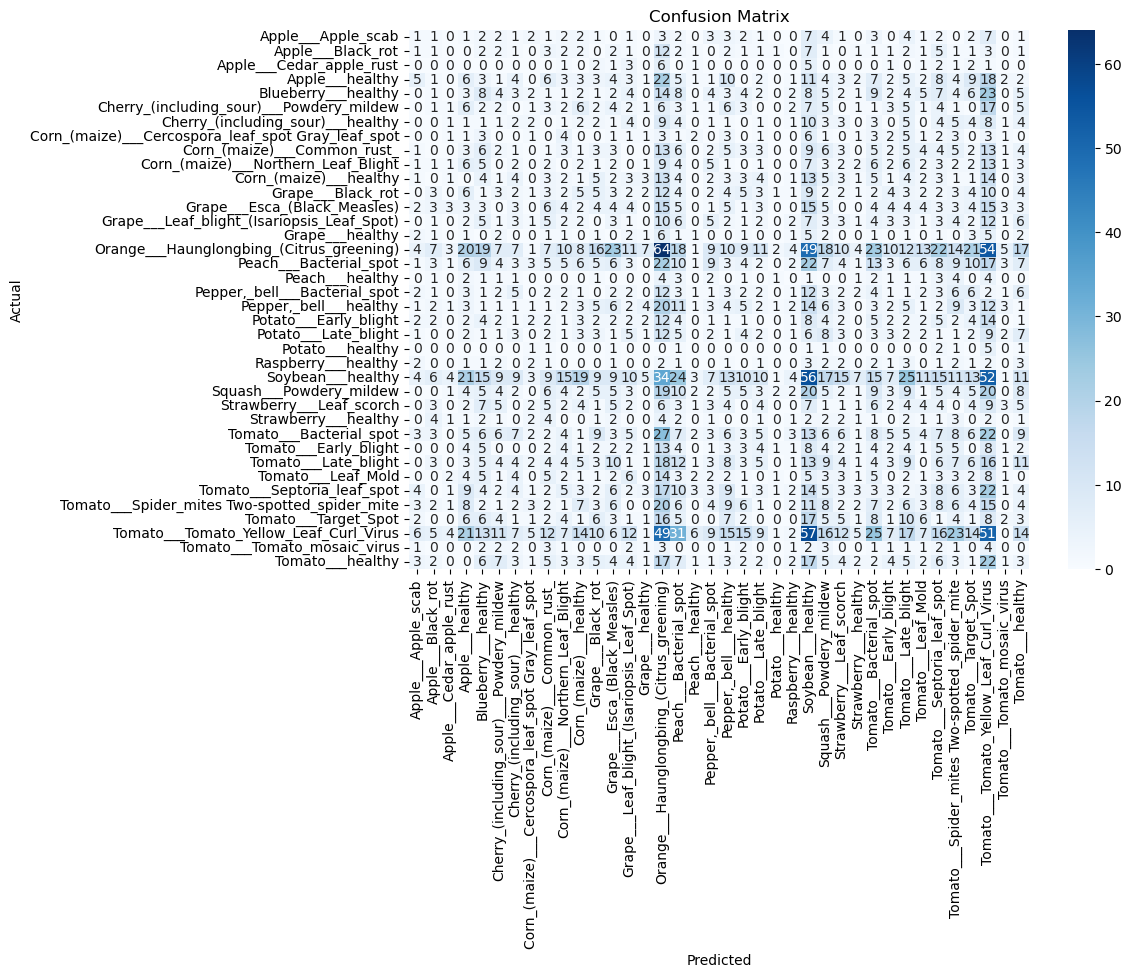

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.02      0.02      0.02        63
                                 Apple___Black_rot       0.02      0.02      0.02        62
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        27
                                   Apple___healthy       0.04      0.04      0.04       164
                               Blueberry___healthy       0.05      0.05      0.05       150
          Cherry_(including_sour)___Powdery_mildew       0.02      0.02      0.02       105
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02        85
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02        51
                       Corn_(maize)___Common_rust_       0.01      0.01      0.01       119
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

In [105]:
# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

### Test Loss vs. Accuracy Trend
- Test loss should decrease and remain lower, while accuracy increases after training.
- If the test loss starts increasing while accuracy plateaus, this indicates overfitting.
- You can add regularization, dropout, or more augmentation if overfitting occurs

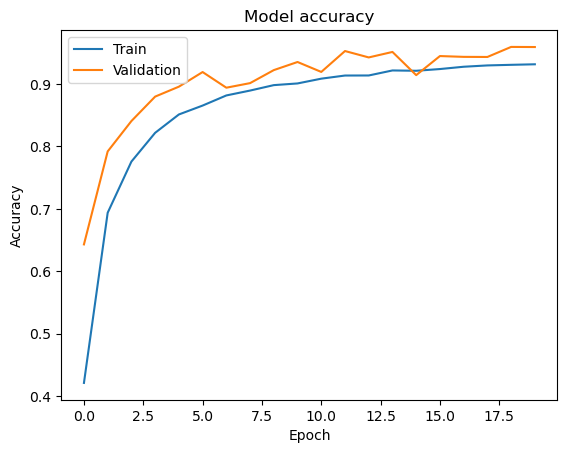

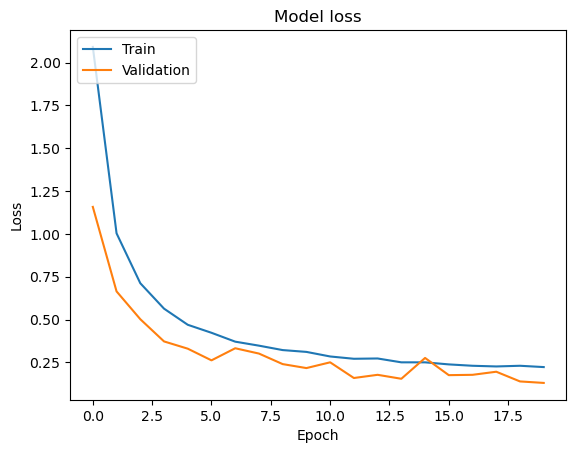

In [107]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [355]:
disease_list = [
    {"disease": "Apple Apple scab", "problem": "Fungal disease causing dark, scabby lesions on leaves and fruit.", "symptom": "Brown to olive-green spots on leaves, with dark lesions on fruit.", "cure": "Use fungicide sprays and plant disease-resistant varieties."},
    {"disease": "Apple Black rot", "problem": "Fungal disease affecting fruit, leaves, and bark.", "symptom": "Dark, rotting spots on fruit and leaves with concentric rings.", "cure": "Prune infected branches, remove diseased fruit, and apply fungicides."},
    {"disease": "Apple Cedar apple rust", "problem": "Fungal disease caused by spores from nearby cedar trees.", "symptom": "Orange spots on leaves and fruit with gelatinous galls on cedar trees.", "cure": "Remove nearby cedars and apply fungicides."},
    {"disease": "Apple healthy", "problem": "No disease present.", "symptom": "Healthy leaves and fruit.", "cure": "Maintain regular care and disease prevention."},
    {"disease": "Blueberry healthy", "problem": "No disease present.", "symptom": "Healthy leaves and fruit.", "cure": "Ensure good soil drainage and proper care."},
    {"disease": "Cherry (including sour) Powdery mildew", "problem": "Fungal disease causing white powdery growth on leaves.", "symptom": "White, powdery coating on leaves, affecting growth.", "cure": "Apply fungicide and remove infected leaves."},
    {"disease": "Cherry (including sour) healthy", "problem": "No disease present.", "symptom": "Healthy leaves and fruit.", "cure": "Regular maintenance and monitoring for pests."},
    {"disease": "Corn (maize) Cercospora leaf spot Gray leaf spot", "problem": "Fungal disease affecting corn leaves.", "symptom": "Gray or brown lesions on leaves, leading to leaf death.", "cure": "Use resistant hybrids and apply fungicides."},
    {"disease": "Corn (maize) Common rust", "problem": "Fungal infection causing rust-colored pustules on corn leaves.", "symptom": "Rusty brown or orange spots on leaves.", "cure": "Use resistant varieties and apply fungicide."},
    {"disease": "Corn (maize) Northern Leaf Blight", "problem": "Fungal disease causing long gray or tan lesions on leaves.", "symptom": "Long, elliptical gray spots on leaves.", "cure": "Use fungicides and plant resistant varieties."},
    {"disease": "Corn (maize) healthy", "problem": "No disease present.", "symptom": "Healthy, green leaves and ears.", "cure": "Maintain good field hygiene and crop rotation."},
    {"disease": "Grape Black rot", "problem": "Fungal disease affecting grapes causing rot.", "symptom": "Dark brown to black spots on leaves and fruit, leading to mummified fruit.", "cure": "Prune infected areas, remove mummified fruit, and apply fungicides."},
    {"disease": "Grape Esca (Black Measles)", "problem": "Fungal disease causing fruit rot and wood decay.", "symptom": "Dark streaks on leaves and fruit with wood rot in vines.", "cure": "Remove infected vines and apply fungicide."},
    {"disease": "Grape Leaf blight (Isariopsis Leaf Spot)", "problem": "Fungal disease causing brown or black spots on leaves.", "symptom": "Brown or black lesions on grapevine leaves.", "cure": "Use fungicides and remove infected leaves."},
    {"disease": "Grape healthy", "problem": "No disease present.", "symptom": "Healthy, vibrant leaves and fruit.", "cure": "Continue proper vine management and pest control."},
    {"disease": "Orange Haunglongbing (Citrus greening)", "problem": "Bacterial disease spread by insects causing fruit deformity.", "symptom": "Yellowing leaves and misshapen, bitter fruit.", "cure": "Control insect vectors and remove infected trees."},
    {"disease": "Peach Bacterial spot", "problem": "Bacterial disease affecting peach trees, leading to leaf and fruit spots.", "symptom": "Small, water-soaked spots on leaves and fruit that turn dark.", "cure": "Apply bactericides and prune affected branches."},
    {"disease": "Peach healthy", "problem": "No disease present.", "symptom": "Healthy, green leaves and well-formed fruit.", "cure": "Maintain good cultural practices and pest management."},
    {"disease": "Pepper, bell Bacterial spot", "problem": "Bacterial disease causing lesions on leaves and fruit.", "symptom": "Water-soaked spots on leaves and fruit, turning brown or black.", "cure": "Use resistant varieties and copper-based bactericides."},
    {"disease": "Pepper, bell healthy", "problem": "No disease present.", "symptom": "Healthy leaves and fruit.", "cure": "Ensure proper soil drainage and pest control."},
    {"disease": "Potato Early blight", "problem": "Fungal disease causing lesions on potato leaves.", "symptom": "Small, dark brown spots on older leaves, with concentric rings.", "cure": "Apply fungicides and rotate crops."},
    {"disease": "Potato Late blight", "problem": "Fungal disease causing large, dark lesions on leaves and tubers.", "symptom": "Large, irregular dark spots on leaves and tubers.", "cure": "Use fungicides and destroy infected plants."},
    {"disease": "Potato healthy", "problem": "No disease present.", "symptom": "Healthy, green leaves and well-formed tubers.", "cure": "Ensure good soil health and pest management."},
    {"disease": "Raspberry healthy", "problem": "No disease present.", "symptom": "Healthy, green leaves and fruit.", "cure": "Maintain regular pruning and pest control."},
    {"disease": "Soybean healthy", "problem": "No disease present.", "symptom": "Healthy, green leaves and pods.", "cure": "Use good crop rotation practices and pest control."},
    {"disease": "Squash Powdery mildew", "problem": "Fungal disease causing white powdery growth on leaves.", "symptom": "White powdery spots on leaves, leading to stunted growth.", "cure": "Apply fungicide and remove infected leaves."},
    {"disease": "Strawberry Leaf scorch", "problem": "Fungal disease affecting strawberry leaves.", "symptom": "Dark brown spots on leaves, leading to leaf death.", "cure": "Remove infected leaves and apply fungicides."},
    {"disease": "Strawberry healthy", "problem": "No disease present.", "symptom": "Healthy leaves and fruit.", "cure": "Maintain good air circulation and moisture levels."},
    {"disease": "Tomato Bacterial spot", "problem": "Bacterial disease causing leaf and fruit lesions.", "symptom": "Small, water-soaked spots on leaves and fruit, turning dark.", "cure": "Use resistant varieties and copper-based bactericides."},
    {"disease": "Tomato Early blight", "problem": "Fungal disease causing leaf spots and fruit rot.", "symptom": "Dark brown spots on older leaves, with concentric rings.", "cure": "Apply fungicides and remove affected leaves."},
    {"disease": "Tomato Late blight", "problem": "Fungal disease causing dark lesions on leaves and fruit.", "symptom": "Large, dark, irregular lesions on leaves and fruit.", "cure": "Use fungicides and destroy infected plants."},
    {"disease": "Tomato Leaf Mold", "problem": "Fungal disease affecting tomato leaves.", "symptom": "Yellow spots on upper leaf surface and mold on undersides.", "cure": "Use fungicides and provide proper ventilation."},
    {"disease": "Tomato Septoria leaf spot", "problem": "Fungal disease causing small leaf spots.", "symptom": "Small, circular spots on leaves, leading to leaf drop.", "cure": "Apply fungicides and rotate crops."},
    {"disease": "Tomato Spider mites Two-spotted spider mite", "problem": "Pest infestation causing yellowing and stippling of leaves.", "symptom": "Yellow stippling on leaves with webbing.", "cure": "Use miticides and encourage natural predators."},
    {"disease": "Tomato Target Spot", "problem": "Fungal disease causing leaf and fruit spots.", "symptom": "Circular spots with concentric rings on leaves and fruit.", "cure": "Apply fungicides and ensure good air circulation."},
    {"disease": "Tomato Tomato Yellow Leaf Curl Virus", "problem": "Viral disease causing yellowing and curling of leaves.", "symptom": "Yellow, curled leaves and stunted growth.", "cure": "Control insect vectors and remove infected plants."},
    {"disease": "Tomato Tomato mosaic virus", "problem": "Viral disease causing leaf mottling and reduced fruit yield.", "symptom": "Mottled, discolored leaves and poor fruit set.", "cure": "Remove infected plants and control pest vectors."},
    {"disease": "Tomato healthy", "problem": "No disease present.", "symptom": "Healthy leaves and well-formed fruit.", "cure": "Maintain good soil health and pest control."}
]


In [357]:
len(disease_list)

38

In [372]:
# Save to a JSON file
with open('disease_list.json', 'w') as json_file:
    json.dump(disease_list, json_file, indent=4)

### Generalization on Unseen Data
- Model should correctly classify at least 80% of unseen images

In [374]:
import json

class_list = []
# Load from the JSON file
with open('disease_list.json', 'r') as json_file:
    class_list = json.load(json_file)

In [388]:
from tensorflow.keras.preprocessing import image
import numpy as np

def get_disease_detail(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Predict the class
    pred_class = np.argmax(model.predict(img_array), axis=1)
    
    class_indices = list(train_generator.class_indices.keys())
    class_idx = int(pred_class[0])
    return class_list[class_idx]

In [394]:
# Load an external image
img_path = '.test/Tomato(Healthy).JPG'
get_disease_detail(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


{'disease': 'Peach Bacterial spot',
 'problem': 'Bacterial disease affecting peach trees, leading to leaf and fruit spots.',
 'symptom': 'Small, water-soaked spots on leaves and fruit that turn dark.',
 'cure': 'Apply bactericides and prune affected branches.'}

### Save Model

In [402]:
model.save('plant_disease_cnn_x.keras')